In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model evaluations
from sklearn.model_selection import train_test_split

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
#loading data
df = pd.read_csv("/Users/amendrasingh/Downloads/Fraud.csv")

In [3]:
# Let's see how the data looks like
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
#checking sum of missing values in every column
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
#overall fraud and non fraud
(df["isFraud"]==1).sum(), (df["isFraud"]==0).sum()

(8213, 6354407)

In [7]:
#flagged values in given data
(df["isFlaggedFraud"]==1).sum()

16

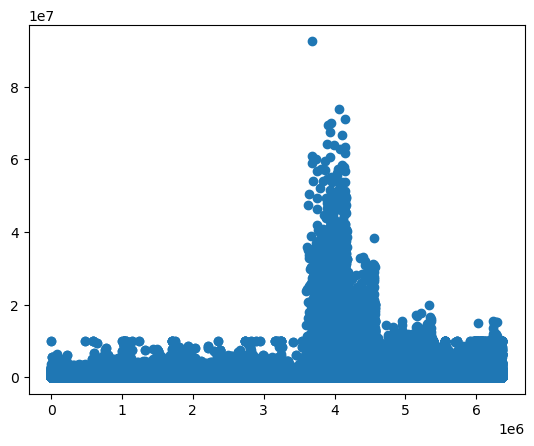

In [8]:
# Let's plot the transaction amounts

fig, ax = plt.subplots()

#we are using scatter plot
ax.scatter(df.index,df.amount);

In [9]:
#unique values of "type" column
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [10]:
#count of values
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [11]:
# using one hot encoding to represent categorical variables as numerical values
one_hot_encoded_data = pd.get_dummies(df, columns = ['type'])

one_hot_encoded_data.head()


,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,0,1,0


In [12]:
# X = input
# y = output
X = one_hot_encoded_data.drop(['isFraud','nameOrig','nameDest'], axis=1)
y = one_hot_encoded_data['isFraud']


In [13]:
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [14]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [15]:
np.random.seed(37)

# split data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
def random_oversampling(features,target,n_samples,r):
    features['Attrition_ind'] = target
    dfSample = features[features.Attrition_ind==1].sample(n=n_samples,replace=True, random_state= r)
    features = features.append(dfSample)
    features = features.sample(frac=1,random_state = r).reset_index(drop=True)
    x,y = features.drop('Attrition_ind',axis=1),features['Attrition_ind']
    return x,y

In [17]:
#oversampled values of x and y
train_x,train_y = random_oversampling(X_train,y_train,12000,40)
minority_class_prevalence_percentage = round((sum(train_y)*1.0)/len(train_y)*100,2)
print(minority_class_prevalence_percentage)

/var/folders/1b/t5jq9j9n3mg0xpjl3c_r1b0m0000gn/T/ipykernel_30245/4097912528.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dfSample)


0.37


# Logistic Regression

In [18]:
clf=LogisticRegression()

In [19]:
#fitting training data
clf.fit(train_x,train_y)

LogisticRegression()

In [20]:
#predicted data
predicted=clf.predict(X_test)
predicted

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
#actual data
y_test

6266165    0
4786871    0
2672365    0
1398421    0
3508773    0
          ..
3317482    0
4424533    0
1308084    0
4914483    0
3497846    0
Name: isFraud, Length: 1272524, dtype: int64

In [22]:
#checking score
clf.score(X_test,y_test)

0.9971584032992697

# Creating Confusion Matrix for LinearRegression

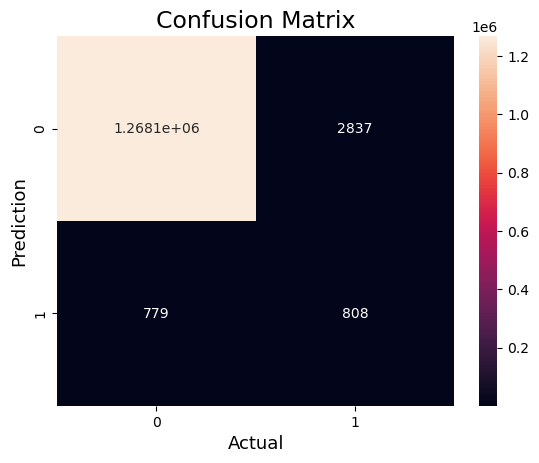

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predicted)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


#(0,0) shows that predicted value is 0 and its actual value is also 0
#(0,1) shows that predicted value is 0 and its actual value is 1
#(1,0) shows that predicted value is 1 and its actual value is 0
#(1,1) represents , its predicted value is 1 and actual value is also 1


In [24]:
recall = 808/(808+779)
print(recall)

0.5091367359798362


# Random Forest

In [25]:
rnf=RandomForestClassifier()

In [26]:
rnf.fit(train_x,train_y)

RandomForestClassifier()

In [27]:
#RandomForest Score
rnf.score(X_test,y_test)

0.9997194551929866

In [33]:
pred2=rnf.predict(X_test)


# Creating Confusion Matrix for RandomForest

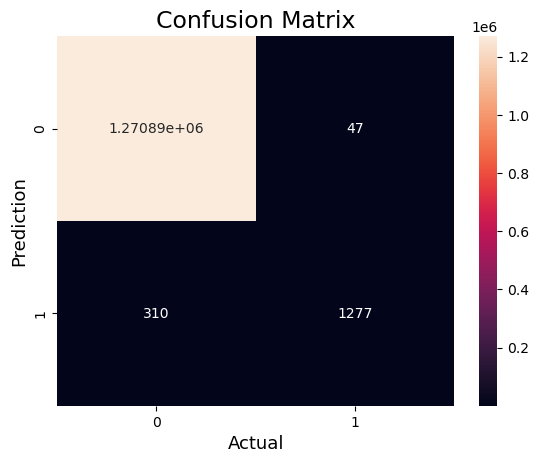

In [31]:
cm2=confusion_matrix(y_test,pred2)
sns.heatmap(cm2,
            annot=True,
            fmt='g',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


In [34]:
recall = 1277/(310+1277)
print(recall)

0.8046628859483301


# Feature Importance

In [39]:
importances = rnf.feature_importances_

In [48]:
forest_importances = pd.Series(importances,index=train_x.columns)
forest_importances

step              0.092409
amount            0.163023
oldbalanceOrg     0.264921
newbalanceOrig    0.039225
oldbalanceDest    0.070947
newbalanceDest    0.277543
isFlaggedFraud    0.000484
type_CASH_IN      0.005532
type_CASH_OUT     0.025601
type_DEBIT        0.000295
type_PAYMENT      0.004390
type_TRANSFER     0.055628
dtype: float64

In [57]:
#importance from high to low
h2L=forest_importances.sort_values(ascending=False)
h2L

newbalanceDest    0.277543
oldbalanceOrg     0.264921
amount            0.163023
step              0.092409
oldbalanceDest    0.070947
type_TRANSFER     0.055628
newbalanceOrig    0.039225
type_CASH_OUT     0.025601
type_CASH_IN      0.005532
type_PAYMENT      0.004390
isFlaggedFraud    0.000484
type_DEBIT        0.000295
dtype: float64

In [60]:
#TOP 5 features 
h2L.head()

newbalanceDest    0.277543
oldbalanceOrg     0.264921
amount            0.163023
step              0.092409
oldbalanceDest    0.070947
dtype: float64

In [ ]:
#Do these factors make sense? If yes, How? If not, How not?
""" Yes , these factor did make sense , if a transaction occurs upto certain marked limit. It will definitely make
impact on these factors"""